# Final model

## Necessary downloads and library imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
project_path = '/content/drive/My Drive/Colab Notebooks/MATF_ML_project/'

In [3]:
!pip install scikit-multilearn
!pip install ipynb

In [4]:
from ipynb.fs.full.utility import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import pickle
import time
import datetime

from scipy import sparse

import skmultilearn
from skmultilearn.model_selection import iterative_train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

import sklearn.metrics as metrics

## Load data

In [5]:
X_train = sparse.load_npz(project_path + 'data/X_train_vect_concat.npz')
y_train = sparse.load_npz(project_path + 'data/y_train_vect_concat.npz')
X_test = sparse.load_npz(project_path + 'data/X_test_vect_concat.npz')
y_test = sparse.load_npz(project_path + 'data/y_test_vect_concat.npz')

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6051, 15348), (6051, 100), (1577, 15348), (1577, 100))

## Model evaluation

In [7]:
model, history = Sequential_compile_train(X_train.toarray(), y_train.toarray(), epochs=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              15349000  
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
Total params: 15,909,700
Trainable params: 15,909,700
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
190/190 [==============================] - 21s 106ms/step - loss: 0.1236 - binary_accuracy: 0.9650
Epoch 2/3
190/190 [==============================] - 20s 107ms/step - loss: 0.0568 - binary_accuracy: 0.9861
Epoch 3/3
190/190 [=====

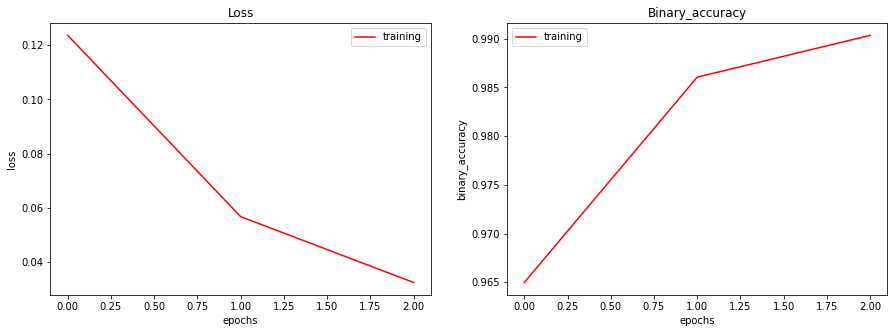

In [8]:
plot_training_histroy(history, validation=False)

In [9]:
print("--------------------")
print("FINAL MODEL METRICS:")
print("--------------------")
predicted_prob = model.predict(X_test)
predicted = predicted_prob.round()
print_metrics(predicted, y_test.toarray())

--------------------
FINAL MODEL METRICS:
--------------------
Hamming Score ('Accuracy' by Keras):	98.774
Hamming Score (= 1 - Hamming Loss):	98.774
Exact match ratio (Subset Accuracy):	23.082
F1-Score Micro Averaged:		46.380
F1-Score Macro Averaged:		24.680
F1-Score Weighted Average:		55.439
Precision Score Micro Averaged:		34.304
Recall Score Micro Averaged:		71.575


## Final model

In [10]:
X = sparse.vstack([X_train, X_test])
y = sparse.vstack([y_train, y_test])

In [11]:
X.shape, y.shape

((7628, 15348), (7628, 100))

In [12]:
model, history = Sequential_compile_train(X.toarray(), y.toarray(), epochs=3, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              15349000  
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
Total params: 15,909,700
Trainable params: 15,909,700
Non-trainable params: 0
_________________________________________________________________


## Save model

In [13]:
model.save(project_path + 'models/final_model.hdf5')